In [1179]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.pyplot as figure
import math
from matplotlib.ticker import MaxNLocator
from scipy import stats

In [1180]:
asr=pd.read_csv('data1_age_sex_race.csv')
asr.drop_duplicates(keep='first',inplace=True)
srh=pd.read_csv('data2_SRH.csv')
srh.drop_duplicates(keep='first',inplace=True)
trt=pd.read_csv('data3a_weight_trt.csv')
trt.drop_duplicates(keep='first',inplace=True)
ctl=pd.read_csv('data3b_weight_con.csv')
ctl.drop_duplicates(keep='first',inplace=True)

In [1181]:
def extract_age(input): 
    if "."in input:
        return (re.findall("\d+\.\d+",input))[0]
    else:
        return (re.findall("\d+",input))[0]
    
def drop_columns(df, list_headers):
    return df.drop(list_headers,axis=1)


In [1182]:
subject_demographic=pd.DataFrame()
subject_demographic['ID']=asr['subject_ID']
subject_demographic['Sex']=asr['SexAge_Race'].str[0]
subject_demographic['Age']=(asr['SexAge_Race'].apply(extract_age)).astype(float)
subject_demographic['Race']=asr['SexAge_Race'].str.split('_').str[1]

In [1081]:
treated=trt.groupby('Id', as_index=False).agg({"PRE_WEIGHT": "mean","POST_WEIGHT":'mean'})
treated['WEIGHT_DIFFERENCE']= treated["POST_WEIGHT"]-treated["PRE_WEIGHT"]
treated = treated.join(subject_demographic.set_index('ID'), on='Id')
treated = treated.join(srh_pre_treated.set_index('id'), on='Id')
treated = treated.join(srh_post_treated.set_index('id'), on='Id')
treated['Color']=treated['Race'].apply(color)
treated.drop_duplicates(keep='first',inplace=True) 
treated_men = treated.loc[(treated['Sex'] == 'M')]
treated_men.drop_duplicates(keep='first',inplace=True) 
treated_women = treated.loc[(treated['Sex'] == 'F')]
treated_women.drop_duplicates(keep='first',inplace=True)

/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [1183]:
srh_pre_treated = srh.loc[(srh['TIME'] == 'PRE') & (srh['trt']==1)]
srh_post_treated = srh.loc[(srh['TIME'] == 'POST') & (srh['trt']==1)]
srh_pre_ctl = srh.loc[(srh['TIME'] == 'PRE') & (srh['trt']==0)]
srh_post_ctl = srh.loc[(srh['TIME'] == 'POST') & (srh['trt']==0)]
srh_pre_treated['PRE']=srh_pre_treated['SRH'].apply(srh_num)
srh_post_treated['POST']=srh_post_treated['SRH'].apply(srh_num)
srh_pre_ctl['PRE']=srh_pre_ctl['SRH'].apply(srh_num)
srh_post_ctl['POST']=srh_post_ctl['SRH'].apply(srh_num)
srh_pre_treated = drop_columns(srh_pre_treated,(['TIME','SRH','trt']))
srh_post_treated = drop_columns(srh_post_treated,(['TIME','SRH','trt']))
srh_pre_ctl = drop_columns(srh_pre_ctl,(['TIME','SRH','trt']))
srh_post_ctl = drop_columns(srh_post_ctl,(['TIME','SRH','trt']))

/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [829]:
def srh_num(input):
    #turn self evaluation into number
    if input[0]=='V':
        return 0
    elif input[0]=='P':
        return 1
    elif input[0]=='S':
        return 2
    elif input[0]=='G':
        return 3
    elif input[0]=='E':
        return 4
    else:
        return "error"

In [1239]:
control=ctl.groupby('obs_ID', as_index=False).agg({"PRE_WEIGHT": "mean","POST_WEIGHT":'mean'})
control['WEIGHT_DIFFERENCE']= control["POST_WEIGHT"]-control["PRE_WEIGHT"]


control = control.join(subject_demographic.set_index('ID'), on='obs_ID')
control = control.join(srh_pre_ctl.set_index('id'), on='obs_ID')
control = control.join(srh_post_ctl.set_index('id'), on='obs_ID')

control.drop_duplicates(keep='first',inplace=True)
control_men = control.loc[(control['Sex'] == 'M')]
control_women = control.loc[(control['Sex'] == 'F')]

def feeling(df):
    return df['POST']-df['PRE']
control['feeling']= feeling(control)
treated['feeling']=feeling(treated)

In [982]:
treated.head()

,Id,PRE_WEIGHT,POST_WEIGHT,WEIGHT_DIFFERENCE,Sex,Age,Race,PRE,POST,Color
0,1,135.2510,125.6678,-9.5832,M,41.2,White,3,1,b
1,2,154.8713,153.9882,-0.8831,F,42.9,White,1,0,b
2,3,128.1951,115.5969,-12.5982,F,38.5,White,2,3,b
3,4,183.4600,177.0187,-6.4413,F,35.6,Hispanic,1,3,r
4,5,166.3726,163.9262,-2.4464,F,48.5,White,1,1,b


In [1089]:
def feeling(df):
    return df['POST']-df['PRE']
control['feeling']= feeling(control)
treated['feeling']=feeling(treated)

In [970]:
treated_women_under = treated_women.loc[(treated_women['POST_WEIGHT'] < 100)]
treated_women_mid = treated_women.loc[(treated_women['POST_WEIGHT'] >= 100) & (treated_women['POST_WEIGHT'] <= 150)]
treated_women_over = treated_women.loc[(treated_women['POST_WEIGHT'] > 150)]

control_women_under = control_women.loc[(control_women['POST_WEIGHT'] < 100)]
control_women_mid = control_women.loc[(control_women['POST_WEIGHT'] >= 100) & (treated_women['POST_WEIGHT'] <= 150)]
control_women_over = control_women.loc[(control_women['POST_WEIGHT'] > 150)]

In [971]:
treated_men_under = treated_men.loc[(treated_men['POST_WEIGHT'] < 122)]
treated_men_mid = treated_men.loc[(treated_men['POST_WEIGHT'] >= 122) & (treated_men['POST_WEIGHT'] <= 209)]
treated_men_over = treated_men.loc[(treated_men['POST_WEIGHT'] > 209)]

control_men_under = control_men.loc[(control_men['POST_WEIGHT'] < 122)]
control_men_mid = control_men.loc[(control_men['POST_WEIGHT'] >= 122) & (treated_men['POST_WEIGHT'] <= 209)]
control_men_over = control_men.loc[(control_men['POST_WEIGHT'] > 209)]

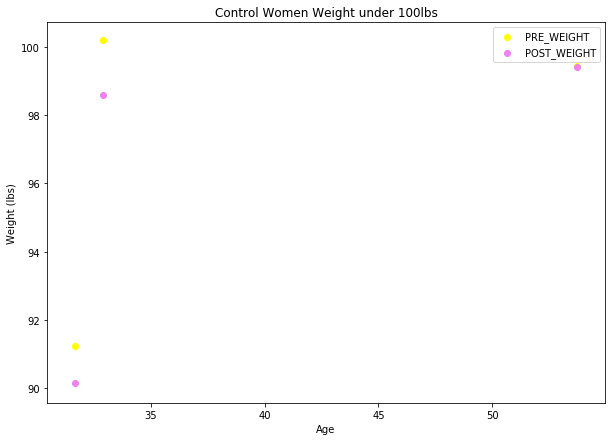

In [1091]:
plt.figure(figsize = (10,7))
plt.scatter(control_women_under['Age'], control_women_under['PRE_WEIGHT'], color = 'yellow')
plt.scatter(control_women_under['Age'], control_women_under['POST_WEIGHT'], color = 'violet')
plt.xlabel('Age')
plt.ylabel('Weight (lbs)')
plt.title('Control Women Weight under 100lbs')
plt.legend()

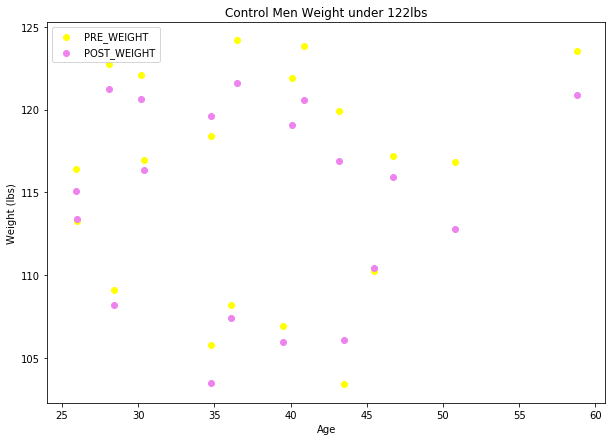

In [930]:
plt.figure(figsize = (10,7))
plt.scatter(control_men_under['Age'], control_men_under['PRE_WEIGHT'], color = 'yellow')
plt.scatter(control_men_under['Age'], control_men_under['POST_WEIGHT'], color = 'violet')
plt.xlabel('Age')
plt.ylabel('Weight (lbs)')
plt.title('Control Men Weight under 122lbs')
plt.legend()

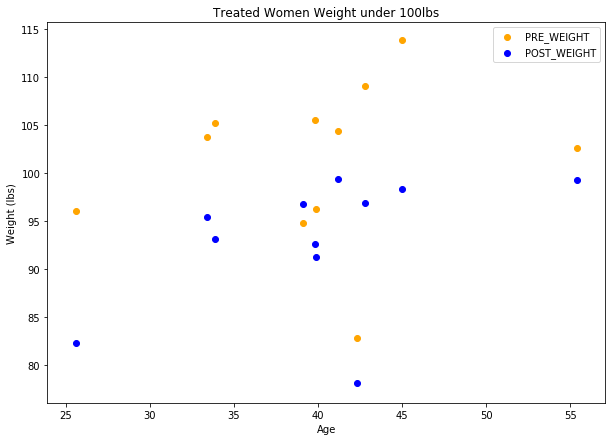

In [1090]:
plt.figure(figsize = (10,7))
plt.scatter(treated_women_under['Age'], treated_women_under['PRE_WEIGHT'], color = 'orange')
plt.scatter(treated_women_under['Age'], treated_women_under['POST_WEIGHT'], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Weight (lbs)')
plt.title('Treated Women Weight under 100lbs')
plt.legend()

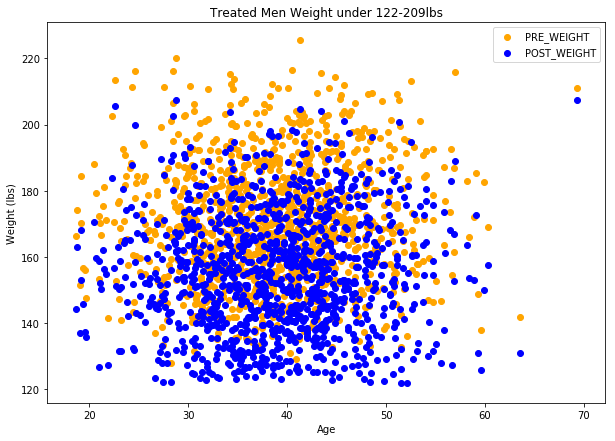

In [933]:
plt.figure(figsize = (10,7))
plt.scatter(treated_men_mid['Age'], treated_men_mid['PRE_WEIGHT'], color = 'orange')
plt.scatter(treated_men_mid['Age'], treated_men_mid['POST_WEIGHT'], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Weight (lbs)')
plt.title('Treated Men Weight under 122-209lbs')
plt.legend()

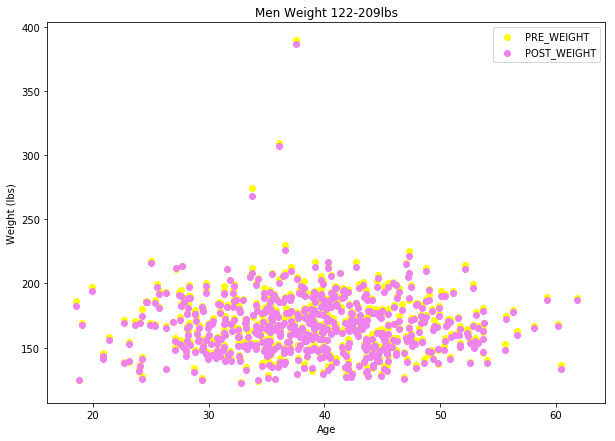

In [935]:
plt.figure(figsize = (10,7))
plt.scatter(control_men_mid['Age'], control_men_mid['PRE_WEIGHT'], color = 'yellow')
plt.scatter(control_men_mid['Age'], control_men_mid['POST_WEIGHT'], color = 'violet')
plt.xlabel('Age')
plt.ylabel('Weight (lbs)')
plt.title('Men Weight 122-209lbs')
plt.legend()

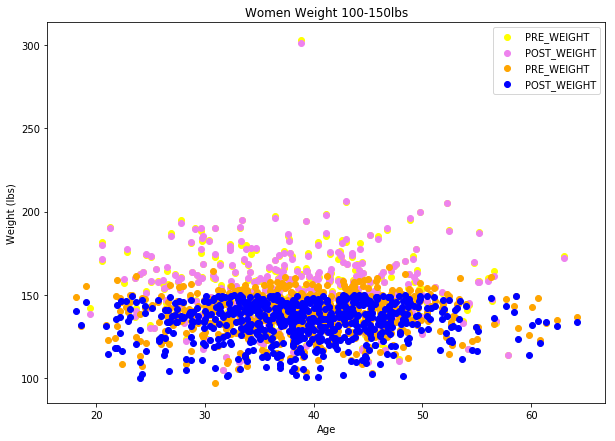

In [917]:
plt.figure(figsize = (10,7))
plt.scatter(control_women_mid['Age'], control_women_mid['PRE_WEIGHT'], color = 'yellow')
plt.scatter(control_women_mid['Age'], control_women_mid['POST_WEIGHT'], color = 'violet')
plt.scatter(treated_women_mid['Age'], treated_women_mid['PRE_WEIGHT'], color = 'orange')
plt.scatter(treated_women_mid['Age'], treated_women_mid['POST_WEIGHT'], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Weight (lbs)')
plt.title('Women Weight 100-150lbs')
plt.legend()

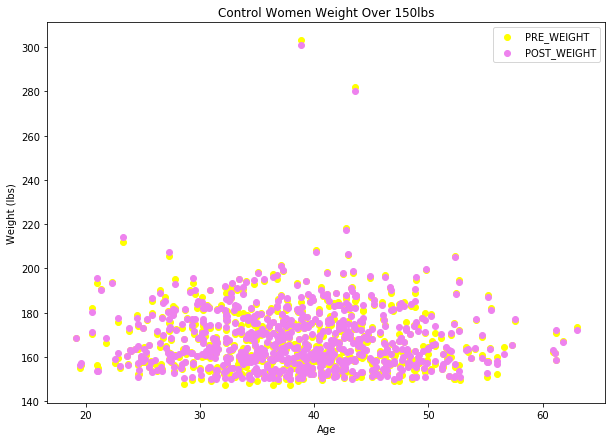

In [920]:
plt.figure(figsize = (10,7))
plt.scatter(control_women_over['Age'], control_women_over['PRE_WEIGHT'], color = 'yellow')
plt.scatter(control_women_over['Age'], control_women_over['POST_WEIGHT'], color = 'violet')
# plt.scatter(treated_women_over['Age'], treated_women_over['PRE_WEIGHT'], color = 'orange')
# plt.scatter(treated_women_over['Age'], treated_women_over['POST_WEIGHT'], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Weight (lbs)')
plt.title('Control Women Weight Over 150lbs')
plt.legend()

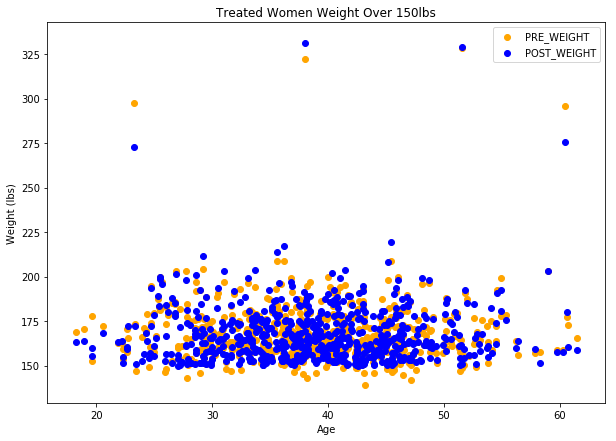

In [921]:
plt.figure(figsize = (10,7))
plt.scatter(treated_women_over['Age'], treated_women_over['PRE_WEIGHT'], color = 'orange')
plt.scatter(treated_women_over['Age'], treated_women_over['POST_WEIGHT'], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Weight (lbs)')
plt.title('Treated Women Weight Over 150lbs')
plt.legend()

Text(0.5, 1.0, 'Control Weight and Weight Loss')

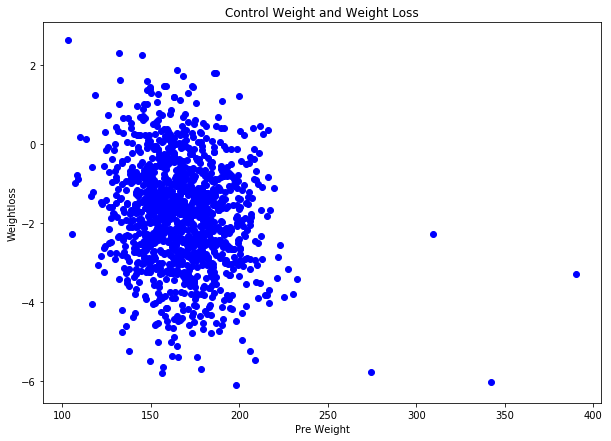

In [972]:
plt.figure(figsize = (10,7))
plt.scatter(control_men['PRE_WEIGHT'], control_men['WEIGHT_DIFFERENCE'], color = 'Blue')
#plt.scatter(control_women['PRE_WEIGHT'], control_women['WEIGHT_DIFFERENCE'], color = 'violet')
plt.xlabel('Pre Weight')
plt.ylabel('Weightloss')
plt.title('Control Weight and Weight Loss')

Text(0.5, 1.0, 'Control Weight and Weight Loss')

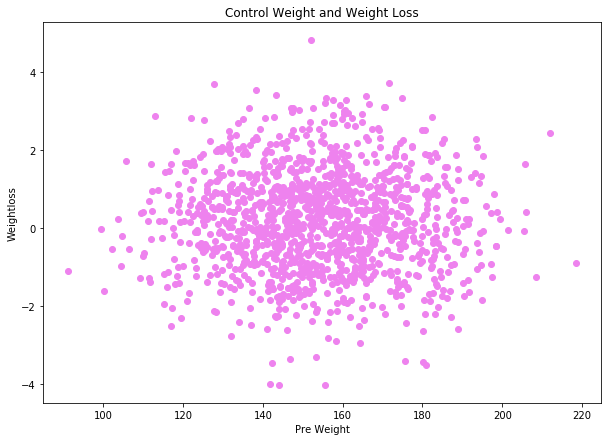

In [1092]:
plt.figure(figsize = (10,7))
#plt.scatter(control_men['PRE_WEIGHT'], control_men['WEIGHT_DIFFERENCE'], color = 'Blue')
plt.scatter(control_women['PRE_WEIGHT'], control_women['WEIGHT_DIFFERENCE'], color = 'violet')
plt.xlabel('Pre Weight')
plt.ylabel('Weightloss')
plt.title('Control Weight and Weight Loss')

/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


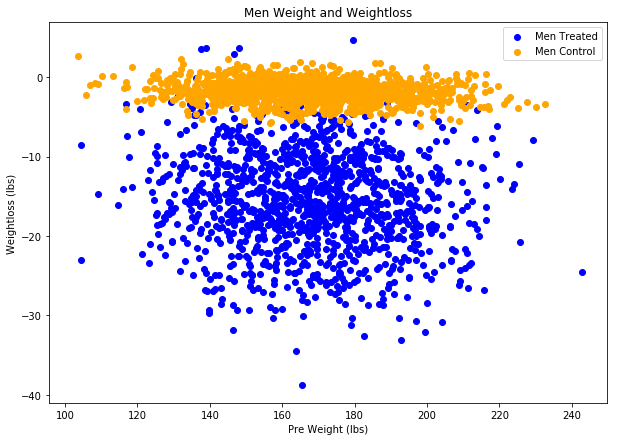

In [1114]:
treated_men['Men Treated']=treated_men['WEIGHT_DIFFERENCE']
control_men['Men Control']=control_men['WEIGHT_DIFFERENCE']

plt.figure(figsize = (10,7))
plt.scatter(treated_men['PRE_WEIGHT'], treated_men['Men Treated'], color = 'Blue')
plt.scatter(control_men['PRE_WEIGHT'], control_men['Men Control'], color = 'Orange')
#plt.scatter(treated_women['PRE_WEIGHT'], treated_women['WEIGHT_DIFFERENCE'], color = 'violet')
plt.xlabel('Pre Weight (lbs)')
plt.ylabel('Weightloss (lbs)')
plt.title('Men Weight and Weightloss')
plt.legend()

/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


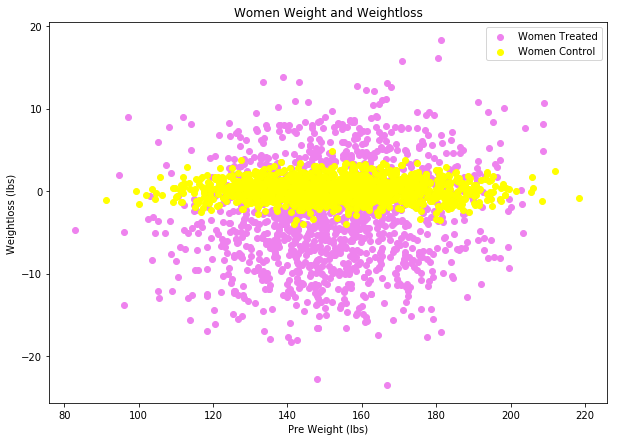

In [1115]:
treated_women['Treated']=treated_women['WEIGHT_DIFFERENCE']
control_women['Control']=control_women['WEIGHT_DIFFERENCE']

plt.figure(figsize = (10,7))
plt.scatter(treated_women['PRE_WEIGHT'], treated_women['Women Treated'], color = 'violet')
plt.scatter(control_women['PRE_WEIGHT'], control_women['Women Control'], color = 'yellow')
#plt.scatter(treated_women['PRE_WEIGHT'], treated_women['WEIGHT_DIFFERENCE'], color = 'violet')
plt.xlabel('Pre Weight (lbs)')
plt.ylabel('Weightloss (lbs)')
plt.title('Women Weight and Weightloss')
plt.legend()

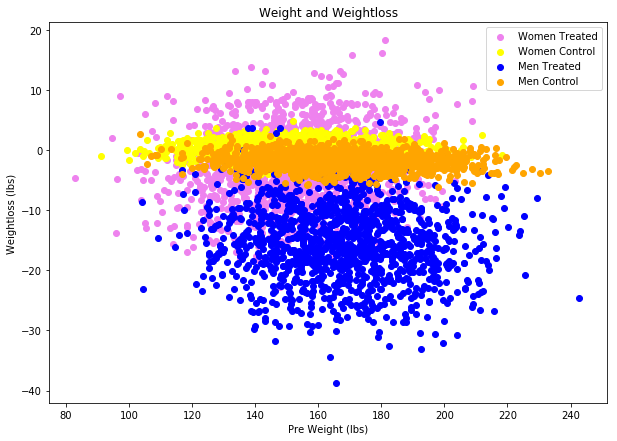

In [1112]:
# treated_men['Men Treated']=treated_women['WEIGHT_DIFFERENCE']
# control_men['Men Control']=control_women['WEIGHT_DIFFERENCE']
# treated_women['Women Treated']=treated_women['WEIGHT_DIFFERENCE']
# control_women['Women Control']=control_women['WEIGHT_DIFFERENCE']

plt.figure(figsize = (10,7))
plt.scatter(treated_women['PRE_WEIGHT'], treated_women['Women Treated'], color = 'violet')
plt.scatter(control_women['PRE_WEIGHT'], control_women['Women Control'], color = 'yellow')
plt.scatter(treated_men['PRE_WEIGHT'], treated_men['Men Treated'], color = 'Blue')
plt.scatter(control_men['PRE_WEIGHT'], control_men['Men Control'], color = 'Orange')

plt.xlabel('Pre Weight (lbs)')
plt.ylabel('Weightloss (lbs)')
plt.title('Weight and Weightloss')
plt.legend()

Text(0.5, 1.0, 'Treated Weight and Weight Loss')

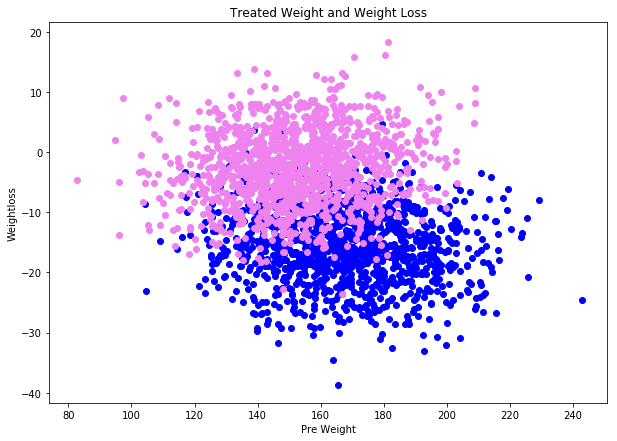

In [1096]:
treated_women['Treated']=treated_women['WEIGHT_DIFFERENCE']
control_women['Control']=control_women['WEIGHT_DIFFERENCE']

plt.figure(figsize = (10,7))
plt.scatter(treated_women['PRE_WEIGHT'], treated_women['Treated'], color = 'violet')
plt.scatter(control_women['PRE_WEIGHT'], control_women['Control'], color = 'yellow')
#plt.scatter(treated_women['PRE_WEIGHT'], treated_women['WEIGHT_DIFFERENCE'], color = 'violet')
plt.xlabel('Pre Weight (lbs)')
plt.ylabel('Weightloss (lbs)')
plt.title('Weight and Weightloss')
plt.legend()

In [1004]:
trt1 = (trt.drop_duplicates(keep='first',inplace=True))

In [1009]:
tr1 = trt.drop_duplicates(subset ="Id", keep = 'first', inplace = True) 
  

In [1011]:
trt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 5015
Data columns (total 3 columns):
Id             2500 non-null int64
PRE_WEIGHT     2500 non-null float64
POST_WEIGHT    0 non-null float64
dtypes: float64(2), int64(1)
memory usage: 78.1 KB


In [1036]:
t2=pd.read_csv('data3a_weight_trt.csv')

In [1020]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5017 entries, 0 to 5016
Data columns (total 3 columns):
Id             5017 non-null int64
PRE_WEIGHT     2508 non-null float64
POST_WEIGHT    2509 non-null float64
dtypes: float64(2), int64(1)
memory usage: 117.7 KB


In [1034]:
t2.drop_duplicates(subset ="Id", keep = 'first', inplace = True) 

In [1057]:
treat = trt.groupby('Id', as_index=False)

In [1172]:
trt=pd.read_csv('data3a_weight_trt.csv')
trt.drop_duplicates(keep='first',inplace=True)

In [1195]:
cm = control_men['WEIGHT_DIFFERENCE']
tm = treated_men['WEIGHT_DIFFERENCE']
cw = control_women['WEIGHT_DIFFERENCE']
tw = treated_women['WEIGHT_DIFFERENCE']
cm_mean = np.mean(cm)
tm_mean = np.mean(tm)
print("control men mean value:",cm_mean)
print("treated men mean value:",tm_mean)
cm_std = np.std(cm)
tm_std = np.std(tm)
print("control men std value:",cm_std)
print("treated men std value:",tm_std)
ttest,pval = stats.ttest_ind(tm,cm)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

control men mean value: -1.8001809876543213
treated men mean value: -15.525255622457262
control men std value: 1.3654996454503199
treated men std value: 6.255775110081425
p-value 0.0
we reject null hypothesis


In [1227]:
stats.ttest_ind(cw2,tw)

Ttest_indResult(statistic=16.173197806382518, pvalue=4.47946960134959e-56)

In [1236]:
stats.ttest_ind(tm2,tw3)

Ttest_indResult(statistic=-50.99487018652138, pvalue=0.0)

In [1233]:
stats.kstest(tw3,tm2)

TypeError: 'Series' object is not callable

In [1226]:
stats.ks_2samp(tw,cw2)

Ks_2sampResult(statistic=0.5106215578284815, pvalue=9.019657464281746e-146)

In [1232]:
stats.ks_2samp(tw3,tm2)

Ks_2sampResult(statistic=0.6958261697312313, pvalue=2.8074829183413507e-264)

In [1230]:
tm2 = tm.head(1215)

In [1224]:
cw2 = cw.head(1271)

In [1228]:
tw3 = tw.head(2015)

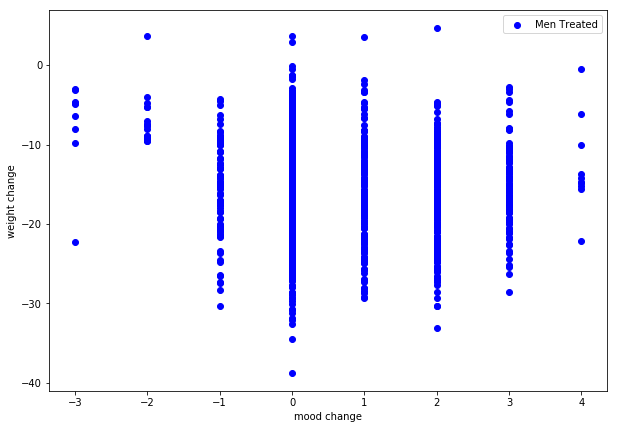

In [1265]:
plt.figure(figsize = (10,7))

plt.scatter(treated_men['feeling'], treated_men['Men Treated'], color = 'Blue')

plt.xlabel('mood change')
plt.ylabel('weight change')

plt.legend()

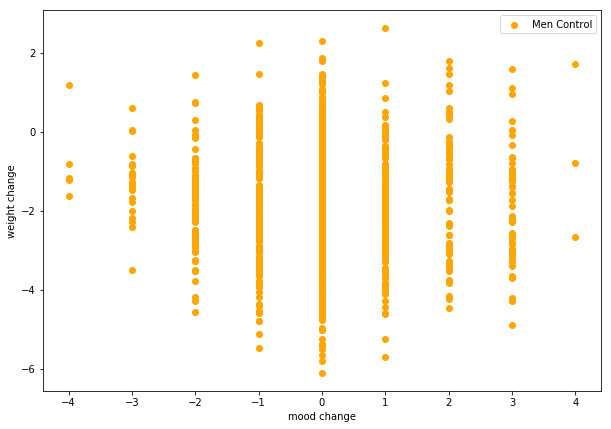

In [1266]:
plt.figure(figsize = (10,7))

plt.scatter(control_men['feeling'], control_men['Men Control'], color = 'Orange')
plt.xlabel('mood change')
plt.ylabel('weight change')

plt.legend()

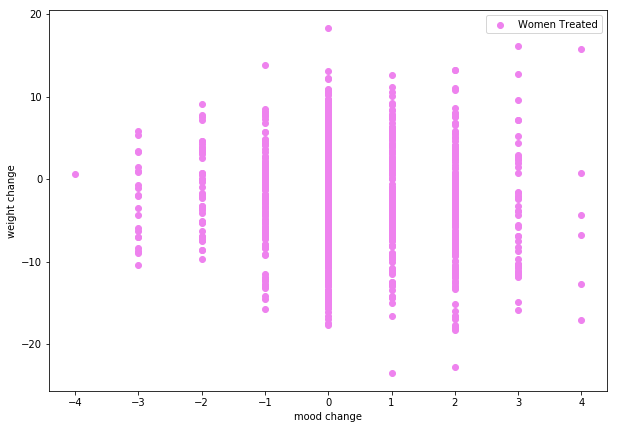

In [1263]:
plt.figure(figsize = (10,7))
plt.scatter(treated_women['feeling'], treated_women['Women Treated'], color = 'violet')
plt.xlabel('mood change')
plt.ylabel('weight change')

plt.legend()

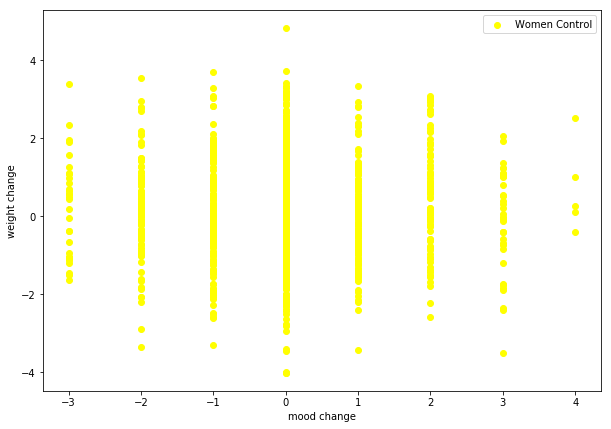

In [1264]:
plt.figure(figsize = (10,7))
plt.scatter(control_women['feeling'], control_women['Women Control'], color = 'yellow')

plt.xlabel('mood change')
plt.ylabel('weight change')

plt.legend()

In [1240]:
treated_men = treated.loc[(treated['Sex'] == 'M')]
treated_men.drop_duplicates(keep='first',inplace=True) 
treated_women = treated.loc[(treated['Sex'] == 'F')]
treated_women.drop_duplicates(keep='first',inplace=True)

/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [1244]:
treated_men['Men Treated']=treated_women['WEIGHT_DIFFERENCE']
control_men['Men Control']=control_women['WEIGHT_DIFFERENCE']
treated_women['Women Treated']=treated_women['WEIGHT_DIFFERENCE']
control_women['Women Control']=control_women['WEIGHT_DIFFERENCE']


/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [1252]:
control_men.head()

,obs_ID,PRE_WEIGHT,POST_WEIGHT,WEIGHT_DIFFERENCE,Sex,Age,Race,PRE,POST,Men Control
1,2502,176.1611,174.8270,-1.3341,M,46.6,Hispanic,0,0,NaN
2,2503,181.3907,179.9042,-1.4865,M,39.1,Hispanic,3,2,NaN
7,2508,163.1849,164.3772,1.1923,M,35.0,Hispanic,4,0,NaN
8,2509,161.6024,160.3510,-1.2514,M,38.1,Asian,1,1,NaN
10,2511,183.6635,181.5804,-2.0831,M,52.0,White,1,1,NaN


In [1249]:
control_women['feeling']=feeling(control_women)

/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1255]:
treated_men['Men Treated'] = treated_men['WEIGHT_DIFFERENCE']
control_men['Men Control'] = control_men['WEIGHT_DIFFERENCE']

/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1257]:
treated_men.head()

,Id,PRE_WEIGHT,POST_WEIGHT,WEIGHT_DIFFERENCE,Sex,Age,Race,PRE,POST,Color,feeling,Men Treated
0,1,135.2510,125.6678,-9.5832,M,41.2,White,3,1,b,-2,-9.5832
7,8,160.4238,143.1758,-17.2480,M,24.7,Hispanic,4,4,r,0,-17.2480
9,10,187.8683,159.2082,-28.6601,M,37.2,NA,2,3,g,1,-28.6601
11,12,155.6975,132.0746,-23.6229,M,39.0,Hispanic,2,2,r,0,-23.6229
14,15,147.5775,136.3011,-11.2764,M,42.0,White,1,2,b,1,-11.2764


In [1258]:
control_men.head()

,obs_ID,PRE_WEIGHT,POST_WEIGHT,WEIGHT_DIFFERENCE,Sex,Age,Race,PRE,POST,Men Control
1,2502,176.1611,174.8270,-1.3341,M,46.6,Hispanic,0,0,-1.3341
2,2503,181.3907,179.9042,-1.4865,M,39.1,Hispanic,3,2,-1.4865
7,2508,163.1849,164.3772,1.1923,M,35.0,Hispanic,4,0,1.1923
8,2509,161.6024,160.3510,-1.2514,M,38.1,Asian,1,1,-1.2514
10,2511,183.6635,181.5804,-2.0831,M,52.0,White,1,1,-2.0831


In [1259]:
control_men['feeling']=feeling(control_men)

/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


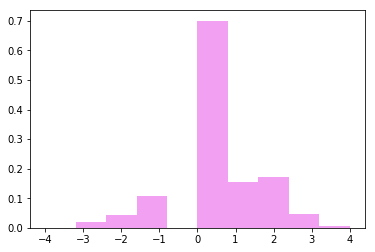

In [1273]:
n, bins, patches = plt.hist(treated_women['feeling'], 10, density=True, facecolor='violet', alpha=0.75)

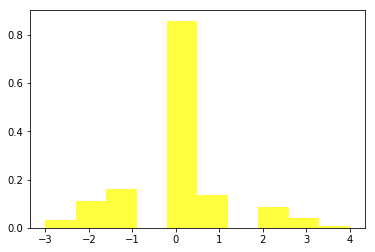

In [1274]:
n, bins, patches = plt.hist(control_women['feeling'], 10, density=True, facecolor='yellow', alpha=0.75)

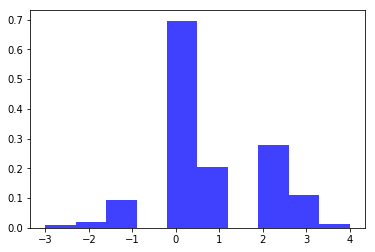

In [1276]:
n, bins, patches = plt.hist(treated_men['feeling'], 10, density=True, facecolor='blue', alpha=0.75)

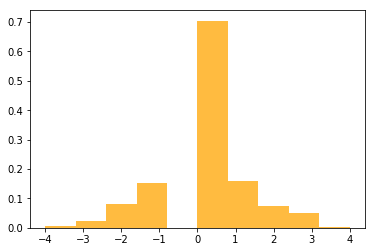

In [1277]:
n, bins, patches = plt.hist(control_men['feeling'], 10, density=True, facecolor='orange', alpha=0.75)

In [1278]:
treated_women

,Id,PRE_WEIGHT,POST_WEIGHT,WEIGHT_DIFFERENCE,Sex,Age,Race,PRE,POST,Color,feeling,Women Treated
1,2,154.8713,153.98820,-0.88310,F,42.9,White,1,0,b,-1,-0.88310
2,3,128.1951,115.59690,-12.59820,F,38.5,White,2,3,b,1,-12.59820
3,4,183.4600,177.01870,-6.44130,F,35.6,Hispanic,1,3,r,2,-6.44130
4,5,166.3726,163.92620,-2.44640,F,48.5,White,1,1,b,0,-2.44640
5,6,120.2300,105.78270,-14.44730,F,36.9,NA,3,4,g,1,-14.44730
6,7,158.7659,151.67880,-7.08710,F,28.9,White,4,4,b,0,-7.08710
8,9,127.1933,119.33160,-7.86170,F,47.1,Black,1,1,c,0,-7.86170
10,11,149.7034,138.66070,-11.04270,F,46.3,Black,0,1,c,1,-11.04270
12,13,155.0966,151.97760,-3.11900,F,40.6,White,2,3,b,1,-3.11900
13,14,171.5426,176.52420,4.98160,F,45.8,Hispanic,0,0,r,0,4.98160
